<a href="https://colab.research.google.com/github/jassriver/ufal_machine_learning/blob/master/Atividade_da_Semana_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação de spam de e-mail**

**O dataset utilizado pega as palavras mais comuns em spam e conta a quantidade de vezes que cada palavra é utilizada no e-mail, fazendo assim a classificação se o email é um spam, ou não.**

Neste dataset a classificação se dá pela coluna "prediction", **1 para Spam e 0 para não spam**

Link do Dataset: [Email Spam Classification Dataset CSV](https://www.kaggle.com/shrutimehta/nasa-asteroids-classification?select=nasa.csv)

In [ ]:
# Monta o ambiente no drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Importa as libs necessarias
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Lendo o dataset e armazenando em variavel ("dataframe", chamaremos de dados)
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/semana_2/datasets/emails.csv')
dados.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Limpa os dados faltantes
dados = dados.dropna()

In [ ]:
# Excluindo colunas irrelevantes
dados = dados.drop(columns=['Email No.'])
dados.head()

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,15,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


**Re-escalando os dados usando mínimo a máximo**

In [ ]:
dados = (dados - dados.min()) / (dados.max() - dados.min())

# **Organizando os dados para a modelagem**

In [ ]:
# dividindo dados em atributos descritores (Todas as colunas menos a 3001) e atributo de classe (somente a coluna 3001, ou seja "-1", a ultima)
x = dados.iloc[:, :-1]
x.head()

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,direction,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001054,0.000000,0.000000,0.000000,0.000000,0.009009,0.000000,0.000000,0.002058,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.003401,0.000000,0.000000,0.000000,0.000000,0.007407,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.008584,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.038095,0.098485,0.067055,0.067416,0.127660,0.025974,0.053741,0.014286,0.161677,0.080717,0.069536,0.117117,0.000000,0.006849,0.062757,0.059701,0.076923,0.0,0.000000,0.076923,0.0,0.044944,0.142857,0.107710,0.129032,0.022901,0.214286,0.004132,0.088889,0.142857,0.034483,0.132075,0.05,0.111111,0.00,0.023256,0.000000,0.0,0.166667,0.064378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008772,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004215,0.000000,0.000000,0.017937,0.006623,0.000000,0.000000,0.000000,0.008230,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.007491,0.000000,0.002268,0.000000,0.000000,0.000000,0.000000,0.014815,0.000000,0.068966,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.037879,0.061224,0.000000,0.106383,0.012987,0.026870,0.028571,0.059880,0.004484,0.016556,0.081081,0.055556,0.000000,0.016461,0.029851,0.000000,0.0,0.058824,0.038462,0.0,0.007491,0.015873,0.040816,0.096774,0.007634,0.142857,0.000000,0.014815,0.142857,0.000000,0.062893,0.10,0.046296,0.08,0.000000,0.034483,0.0,0.000000,0.042918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.033333,0.045455,0.046647,0.011236,0.106383,0.025974,0.030032,0.000000,0.053892,0.013453,0.039735,0.018018,0.055556,0.000000,0.030864,0.119403,0.000000,0.0,0.117647,0.000000,0.0,0.026217,0.000000,0.021542,0.064516,0.030534,0.142857,0.000000,0.029630,0.047619,0.068966,0.037736,0.00,0.055556,0.00,0.000000,0.103448,0.0,0.083333,0.042918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008772,0.0


In [ ]:
# Salva uma referencia para os resultados da classificacao
y = dados.Prediction
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Prediction, dtype: float64

**Dividir os dados em treino e teste**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
x_train.head()

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,direction,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
5044,0.052381,0.075758,0.017493,0.089888,0.191489,0.038961,0.069547,0.314286,0.005988,0.103139,0.072848,0.108108,0.055556,0.000000,0.111111,0.074627,0.115385,0.037736,0.058824,0.076923,0.55,0.067416,0.095238,0.113379,0.129032,0.045802,0.071429,0.016529,0.066667,0.142857,0.0,0.100629,0.10,0.203704,0.0,0.023256,0.000000,0.000000,0.083333,0.188841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4004,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.001581,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001029,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.003745,0.000000,0.003401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.006289,0.00,0.000000,0.0,0.000000,0.000000,0.130435,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2196,0.052381,0.083333,0.011662,0.056180,0.148936,0.012987,0.045311,0.071429,0.017964,0.049327,0.066225,0.126126,0.027778,0.013699,0.066872,0.104478,0.000000,0.000000,0.176471,0.038462,0.10,0.022472,0.063492,0.079365,0.064516,0.053435,0.000000,0.002755,0.044444,0.000000,0.0,0.062893,0.00,0.046296,0.0,0.046512,0.137931,0.173913,0.000000,0.042918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3443,0.009524,0.022727,0.005831,0.000000,0.000000,0.000000,0.003688,0.000000,0.000000,0.008969,0.006623,0.000000,0.000000,0.000000,0.011317,0.029851,0.000000,0.037736,0.000000,0.000000,0.00,0.003745,0.000000,0.007937,0.000000,0.000000,0.000000,0.000000,0.014815,0.047619,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.004292,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017544,0.0
432,0.042857,0.113636,0.002915,0.089888,0.085106,0.116883,0.044257,0.085714,0.000000,0.044843,0.066225,0.063063,0.055556,0.000000,0.073045,0.074627,0.038462,0.018868,0.058824,0.000000,0.05,0.048689,0.111111,0.078231,0.064516,0.030534,0.071429,0.000000,0.059259,0.000000,0.0,0.062893,0.05,0.111111,0.0,0.069767,0.000000,0.000000,0.083333,0.068670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017544,0.0


In [ ]:
y_train.head()

5044    0.0
4004    0.0
2196    0.0
3443    0.0
432     0.0
Name: Prediction, dtype: float64

# **Definindo o algoritmo de aprendizado**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Definindo o modelo
classificador = DecisionTreeClassifier(criterion='entropy')

In [ ]:
# Treinando o modelo
classificador.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Importa o metodo de plotar a arvore
from sklearn.tree import plot_tree

In [ ]:
# Muda o tamanho da figura
plt.rcParams["figure.figsize"] = (30, 20)

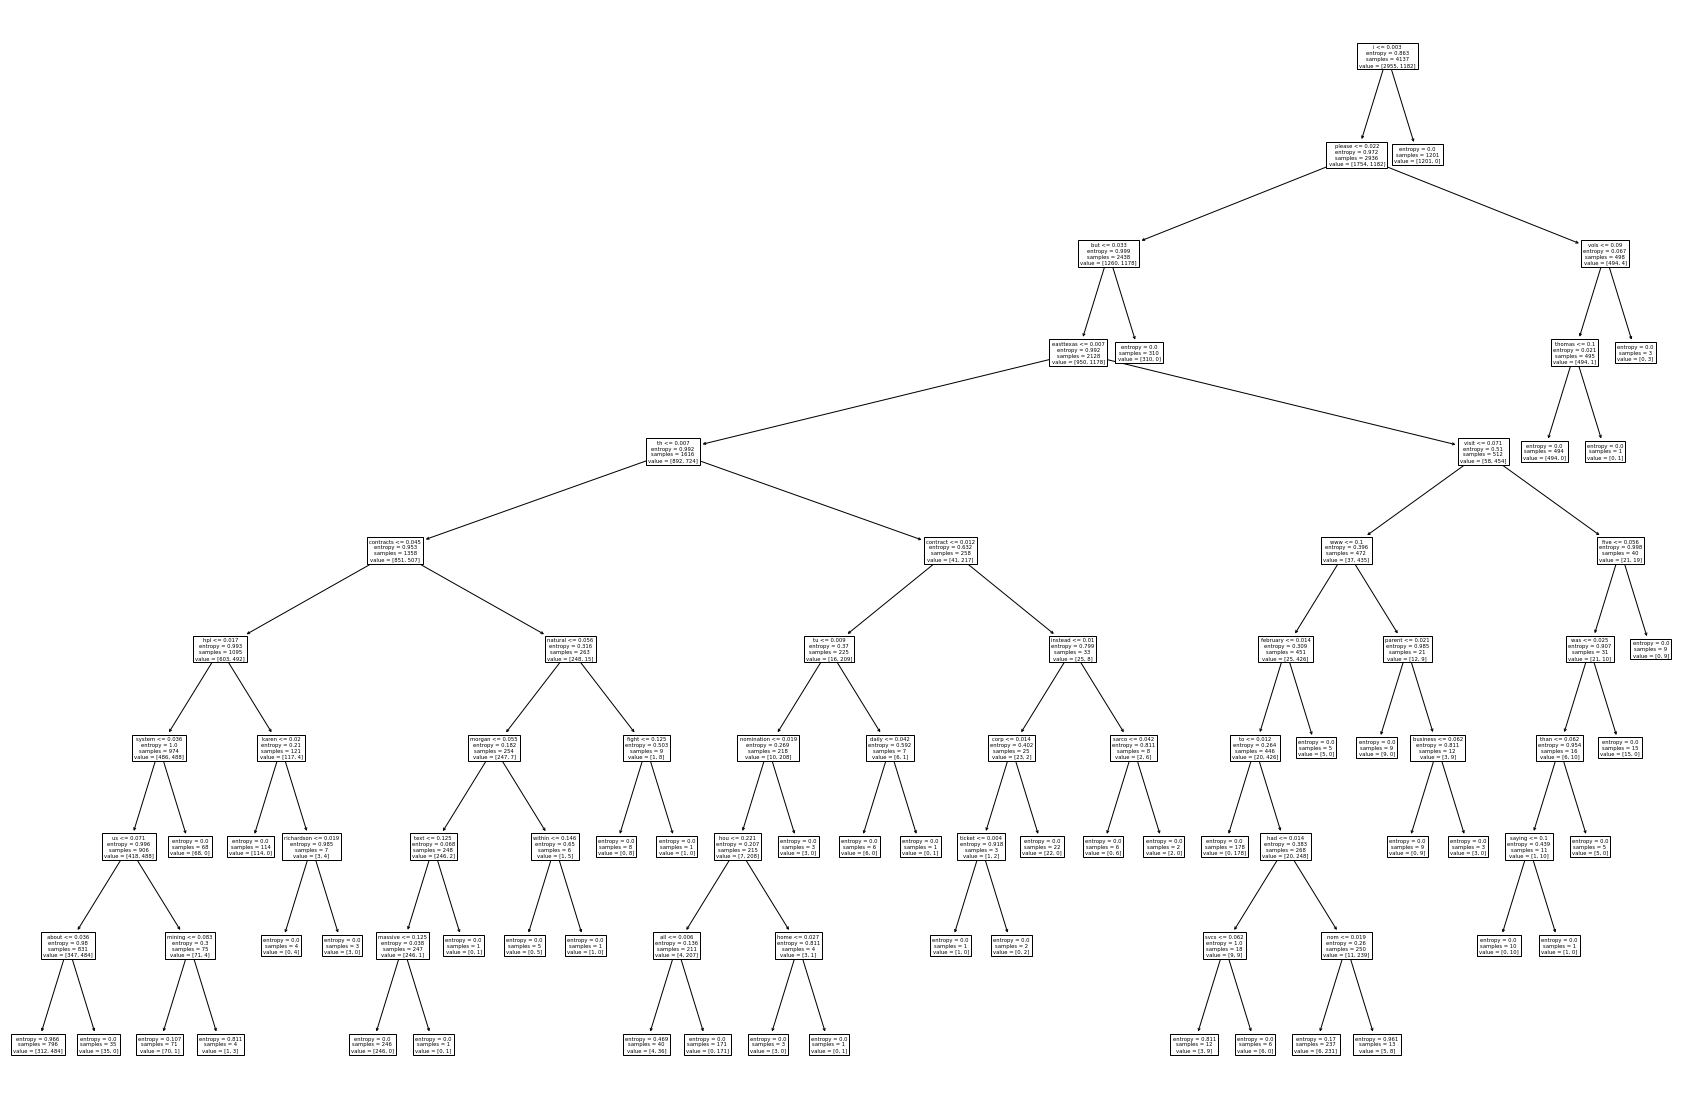

In [ ]:
# Plota a arvore
plot_tree(classificador, feature_names=dados.columns[1:])
plt.show()

In [ ]:
# Mudando o tamanho da figura
plt.rcParams["figure.figsize"] = (8,6)

In [ ]:
# Realiza a classificacao
classificacao = classificador.predict(x_test)
classificacao

array([0., 0., 1., ..., 1., 0., 0.])

In [ ]:
# Printa alguns dados pra visualizacao
for i in range(len(y_test)):
  print(y_test.iloc[i], '\t', classificacao[i])

0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 1.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
1.0 	 0.0
1.0 	 1.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
0.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
1.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
0.0 	 1.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0


**Avaliação do Classificador**

In [ ]:
# Calculando Acuracia
from sklearn.metrics import accuracy_score

In [ ]:
acuracia = accuracy_score(y_test, classificacao)
acuracia

0.9285024154589372

In [ ]:
# Calculando precisao
from sklearn.metrics import precision_score

In [ ]:
precisao = precision_score(y_test, classificacao)
precisao

0.88125

In [ ]:
# Calculando o Recall
from sklearn.metrics import recall_score

In [ ]:
recall = recall_score(y_test, classificacao)
recall

0.8867924528301887

In [ ]:
# Calculando o F1-Score
from sklearn.metrics import f1_score

In [ ]:
f1 = f1_score(y_test, classificacao)
f1

0.8840125391849529

### **Curva ROC**

In [ ]:
# Plotando Curva ROC
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, _ = roc_curve(y_test, classificacao)

In [ ]:
fpr

array([0.        , 0.05299861, 1.        ])

In [ ]:
tpr

array([0.        , 0.88679245, 1.        ])

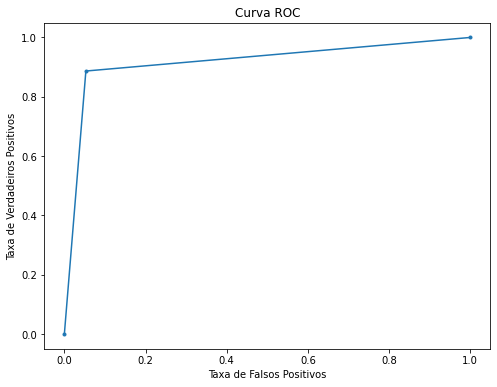

In [ ]:
plt.plot(fpr, tpr, marker=".")
plt.title("Curva ROC")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.show()

### **Área sob a curva**

In [ ]:
# Calculando a area sob a curva ROC
from sklearn.metrics import roc_auc_score

In [ ]:
erro = roc_auc_score(y_test, classificacao)
erro

0.9168969237651641

### **Validação Cruzada**

In [ ]:
# Montando os Folds para validacao cruzada
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits = 5)

In [ ]:
# Imprimindo os indices das instancias do treino e teste
for train, test in kf.split(x):
  print('Treino: ', train, '\nTeste: ', test)
  print('----------------')

Treino:  [1035 1036 1037 ... 5169 5170 5171] 
Teste:  [   0    1    2 ... 1032 1033 1034]
----------------
Treino:  [   0    1    2 ... 5169 5170 5171] 
Teste:  [1035 1036 1037 ... 2067 2068 2069]
----------------
Treino:  [   0    1    2 ... 5169 5170 5171] 
Teste:  [2070 2071 2072 ... 3101 3102 3103]
----------------
Treino:  [   0    1    2 ... 5169 5170 5171] 
Teste:  [3104 3105 3106 ... 4135 4136 4137]
----------------
Treino:  [   0    1    2 ... 4135 4136 4137] 
Teste:  [4138 4139 4140 ... 5169 5170 5171]
----------------


In [ ]:
# Avaliando modelo com cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
# Define o modelo
classificador = DecisionTreeClassifier(criterion="entropy")

In [ ]:
# Calculando os cores
scores = cross_val_score(classificador, x, y, cv=10)
scores

array([0.88996139, 0.91312741, 0.91682785, 0.94003868, 0.9303675 ,
       0.91489362, 0.93810445, 0.93617021, 0.89555126, 0.90522244])

In [ ]:
scores.mean(), scores.std()

(0.9180264818562691, 0.01691490095003272)

## **Comparando a Árvore de Decisão com Random Forest**
### **Método Holdout**

In [ ]:
# Definindo arvore de decisao
arvore = DecisionTreeClassifier(criterion="entropy")
arvore.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Definindo Random Forest
from sklearn.ensemble import RandomForestClassifier
floresta = RandomForestClassifier(n_estimators=100, criterion="entropy")
floresta.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Calculando acuracia da arvore de decisao
arvore.score(x_test, y_test)

0.9246376811594202

In [ ]:
# Calculando acuracia do random forest
floresta.score(x_test, y_test)

0.9719806763285024

In [ ]:
# Realizando a predicao com arvore de decisao
clf_arvore = arvore.predict(x_test)

In [ ]:
# Realizando a predicao com random forest
clf_floresta = floresta.predict(x_test)

In [ ]:
# Calculando a Curva ROC da arvore de decisao
fpr_ar, tpr_ar, _ = roc_curve(y_test, clf_arvore)

In [ ]:
# Calculando a Curva ROC da random forest
fpr_fl, tpr_fl, _ = roc_curve(y_test, clf_floresta)

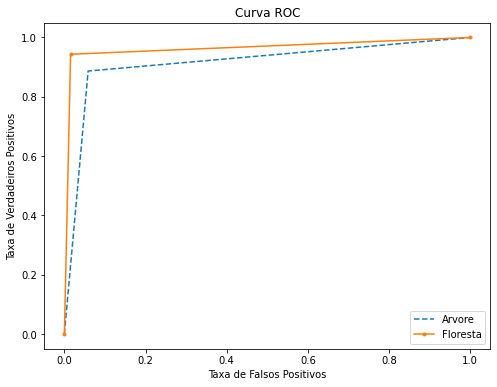

In [ ]:
# Plotando as curvas
plt.plot(fpr_ar, tpr_ar, linestyle="--", label="Arvore")
plt.plot(fpr_fl, tpr_fl, marker=".", label="Floresta")
plt.title("Curva ROC")
plt.legend()
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.show()

### **Validação Cruzada**

In [ ]:
# Criando Arvore
arvore = DecisionTreeClassifier(criterion="entropy")

# Calculando Scores
scores = cross_val_score(arvore, x, y, cv=10)
round(scores.mean(), 3), round(scores.std(), 3)

(0.917, 0.019)

In [115]:
# Criando Random Forest
floresta = RandomForestClassifier(criterion="entropy")

# Calculando Scores
scores = cross_val_score(floresta, x, y, cv=10)
round(scores.mean(), 3), round(scores.std(), 3)

(0.968, 0.013)

# **Interpretação dos Resultados**

Após análisar todos os resultados, foi constatado que o método Random Forest é mais eficiente em quesito de acurácia e precisão para o problema de detecção de spam em emails baseada na quantidade de vezes que as palavras mais comumente encontradas em spam aparecem no email analisado.

O mesmo foi constatado ao observar os resultados da Validação cruzada usando o método "***cross_val_score***"